# Backward Neural network

In [ ]:
## Name: M Sai Subrahmanya Vardhan
## Roll:22EE10038


# Importing Libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from numpy import load
import numpy as np
data=np.load('/content/imbalanced_mnist.npz')

In [ ]:
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

In [ ]:
train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [ ]:
## Apply random transformation to dataset
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(28, 28), padding=4),
    transforms.ToTensor(),
])

train_dataset.transform = transform





In [ ]:
### Code for determining best hyperparameters
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x.float()))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


input_size = 28 * 28
output_size = 10
batch_size = 32
epochs = 10

# Define a grid of hyperparameters
hidden_layer_sizes = [(64, 64), (128, 128), (256, 256)]
learning_rates = [0.001, 0.01, 0.1]


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


best_accuracy = 0
best_hyperparameters = None

for hidden_sizes in hidden_layer_sizes:
    for lr in learning_rates:
        model = Net(input_size, hidden_sizes[0], hidden_sizes[1], output_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)

        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                inputs = inputs.view(inputs.size(0), -1)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()


            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.view(inputs.size(0), -1)
                    outputs = model(inputs)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = correct / total
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.4f}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = {'hidden_layer_sizes': hidden_sizes, 'learning_rate': lr}

print(f'Best hyperparameters: {best_hyperparameters}')


Epoch [1/10], Loss: 0.5053, Accuracy: 0.6902
Epoch [2/10], Loss: 0.2278, Accuracy: 0.9373
Epoch [3/10], Loss: 0.1694, Accuracy: 0.9437
Epoch [4/10], Loss: 0.1401, Accuracy: 0.8289
Epoch [5/10], Loss: 0.1213, Accuracy: 0.9463
Epoch [6/10], Loss: 0.1015, Accuracy: 0.9501
Epoch [7/10], Loss: 0.0892, Accuracy: 0.9536
Epoch [8/10], Loss: 0.0782, Accuracy: 0.9534
Epoch [9/10], Loss: 0.0688, Accuracy: 0.9551
Epoch [10/10], Loss: 0.0609, Accuracy: 0.9554
Epoch [1/10], Loss: 2.6508, Accuracy: 0.1194
Epoch [2/10], Loss: 2.2991, Accuracy: 0.1194
Epoch [3/10], Loss: 2.2988, Accuracy: 0.1194
Epoch [4/10], Loss: 2.1526, Accuracy: 0.2154
Epoch [5/10], Loss: 1.9704, Accuracy: 0.2288
Epoch [6/10], Loss: 1.9425, Accuracy: 0.2030
Epoch [7/10], Loss: 2.2281, Accuracy: 0.1786
Epoch [8/10], Loss: 2.1421, Accuracy: 0.1803
Epoch [9/10], Loss: 2.2773, Accuracy: 0.1196
Epoch [10/10], Loss: 2.2996, Accuracy: 0.1196
Epoch [1/10], Loss: 1382193.1934, Accuracy: 0.1194
Epoch [2/10], Loss: 2.2988, Accuracy: 0.1194
Ep

Epoch [1/10], Train Loss: 0.4738, Val Loss: 0.2627
Epoch [2/10], Train Loss: 0.1935, Val Loss: 0.2085
Epoch [3/10], Train Loss: 0.1369, Val Loss: 0.1816
Epoch [4/10], Train Loss: 0.1056, Val Loss: 0.1756
Epoch [5/10], Train Loss: 0.0843, Val Loss: 0.1748
Epoch [6/10], Train Loss: 0.0695, Val Loss: 0.1572
Epoch [7/10], Train Loss: 0.0561, Val Loss: 0.1526
Epoch [8/10], Train Loss: 0.0454, Val Loss: 0.1537
Epoch [9/10], Train Loss: 0.0375, Val Loss: 0.1614
Epoch [10/10], Train Loss: 0.0304, Val Loss: 0.1572
Test Accuracy: 0.9603


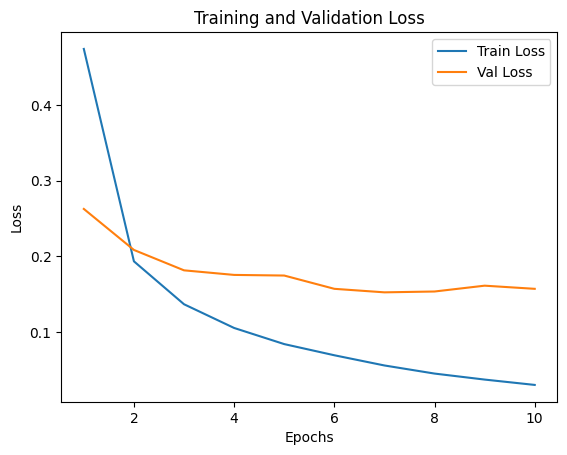

In [ ]:
## Best hyperparameters and plotting for train and validation data
input_size = 28 * 28
output_size = 10
batch_size = 32
epochs = 10
hidden_sizes = (128, 128)
learning_rate = 0.001


transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=(28, 28), padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


model = Net(input_size, hidden_sizes[0], hidden_sizes[1], output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_losses.append(running_train_loss / len(train_loader))


    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_losses.append(running_val_loss / len(val_loader))

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


correct = 0
total = 0
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Visualize the training and validation loss graphs
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
!pip install torchprofile
!pip install torchmetrics
from torchprofile import profile_macs
from torchmetrics import ConfusionMatrix, Precision, Recall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 567.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
## To print total presicion,confussion matrix and recall score
input_size = 28 * 28
output_size = 10
hidden_sizes = (128, 128)

model = Net(input_size, hidden_sizes[0], hidden_sizes[1], output_size)


confusion_matrix = ConfusionMatrix(num_classes=output_size, task='MULTICLASS')


precision = Precision(num_classes=output_size, task='MULTICLASS')


recall = Recall(num_classes=output_size, task='MULTICLASS')


def evaluate(model, data_loader):
    model.eval()
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            confusion_matrix.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)


evaluate(model, test_loader)


cm = confusion_matrix.compute().cpu().numpy()
prec = precision.compute().cpu().numpy()
rec = recall.compute().cpu().numpy()

print("Confusion Matrix:")
print(cm)
print("\n")
print("Precision:")
print(prec)
print("\n")
print("Recall:")
print(rec)


Confusion Matrix:
[[215   1   7   3   0   1 648   0  49  56]
 [ 38   2   1   0   0   0 611   0 472  11]
 [128   5   8  49   0   1 543   5 211  82]
 [126   0  13   1   0   0 757   5  58  50]
 [146   2  11   2   0   1 571   0  67 182]
 [ 82   0  28   0   0   4 641   1  25 111]
 [ 79   0  15   9   0  10 474   1 118 252]
 [177   2  13   5   0   2 371   0 148 310]
 [125   1  26   7   0   0 733   0  33  49]
 [189   2  14   6   0   7 416   0  30 345]]


Precision:
0.1082


Recall:
0.1082


In [ ]:
## Printing flops and params
!pip install flopth
from flopth import flopth
flops, params = flopth(model, in_size=(784,),show_detail=True)
print(flops, params)

+---------------+---------------+------------+-------------+------------------------------+----------+------------------+--------------------------------------------+----------+-----------------+--------------------------------------------+
| module_name   | module_type   | in_shape   | out_shape   | kernel_size,padding,stride   | params   | params_percent   | params_percent_vis                         | flops    | flops_percent   | flops_percent_vis                          |
+===============+===============+============+=============+==============================+==========+==================+============================================+==========+=================+============================================+
| fc1           | Linear        | (784)      | (128)       |                              | 100.48K  | 84.9495%         | ########################################## | 100.352K | 84.9404%        | ########################################## |
+---------------+---------------+---

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output and feed it into a dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1415 - accuracy: 0.9567 - val_loss: 0.0491 - val_accuracy: 0.9842
Epoch 2/5
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0313 - accuracy: 0.9908
Test accuracy: 0.9908000230789185
